# Import Required Libraries
Import the necessary libraries, including pandas, numpy, and networkx.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import networkx as nx

# Load and Explore Dataset
Load the dataset containing start_date, finish_date, status, and status_change_date. Perform initial exploration to understand the data.

In [2]:
# Load and Explore Dataset

# Load the dataset
df = pd.read_csv('availableData.csv')

# Display the first few rows of the dataset
df.head()

# Display basic information about the dataset
df.info()

# Display summary statistics of the dataset
df.describe()

# Check for missing values in the dataset
df.isnull().sum()

# Display the unique values in the 'status' column
df['my_status'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4863104 entries, 0 to 4863103
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   username             object 
 1   anime_id             int64  
 2   my_watched_episodes  int64  
 3   my_start_date        object 
 4   my_finish_date       object 
 5   my_score             int64  
 6   my_status            object 
 7   my_rewatching        float64
 8   my_rewatching_ep     int64  
 9   my_last_updated      object 
 10  my_tags              object 
 11  completion_status    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 445.2+ MB


array(['completed', 'dropped', 'watching', 'on hold', 'plan to watch',
       nan], dtype=object)

# Preprocess Data
Clean and preprocess the data, including handling missing values and converting dates to a suitable format.

In [3]:
# Preprocess Data

# Handle missing values by filling them with appropriate values or dropping rows/columns
df = df.dropna(subset=['my_start_date', 'my_finish_date', 'my_last_updated'])

# Convert date columns to datetime format
df['my_start_date'] = pd.to_datetime(df['my_start_date'], errors='coerce')
df['my_finish_date'] = pd.to_datetime(df['my_finish_date'], errors='coerce')
df['status_change_date'] = pd.to_datetime(df['my_last_updated'], errors='coerce')

# Drop rows with NaT values in date columns
df = df.dropna(subset=['my_start_date', 'my_finish_date', 'status_change_date'])

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3647099 entries, 0 to 4863095
Data columns (total 13 columns):
 #   Column               Dtype         
---  ------               -----         
 0   username             object        
 1   anime_id             int64         
 2   my_watched_episodes  int64         
 3   my_start_date        datetime64[ns]
 4   my_finish_date       datetime64[ns]
 5   my_score             int64         
 6   my_status            object        
 7   my_rewatching        float64       
 8   my_rewatching_ep     int64         
 9   my_last_updated      object        
 10  my_tags              object        
 11  completion_status    object        
 12  status_change_date   datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(4), object(5)
memory usage: 389.6+ MB


# Create User-Anime Graph
Use networkx to create a graph where nodes represent users and anime, and edges represent the connections based on the dataset.

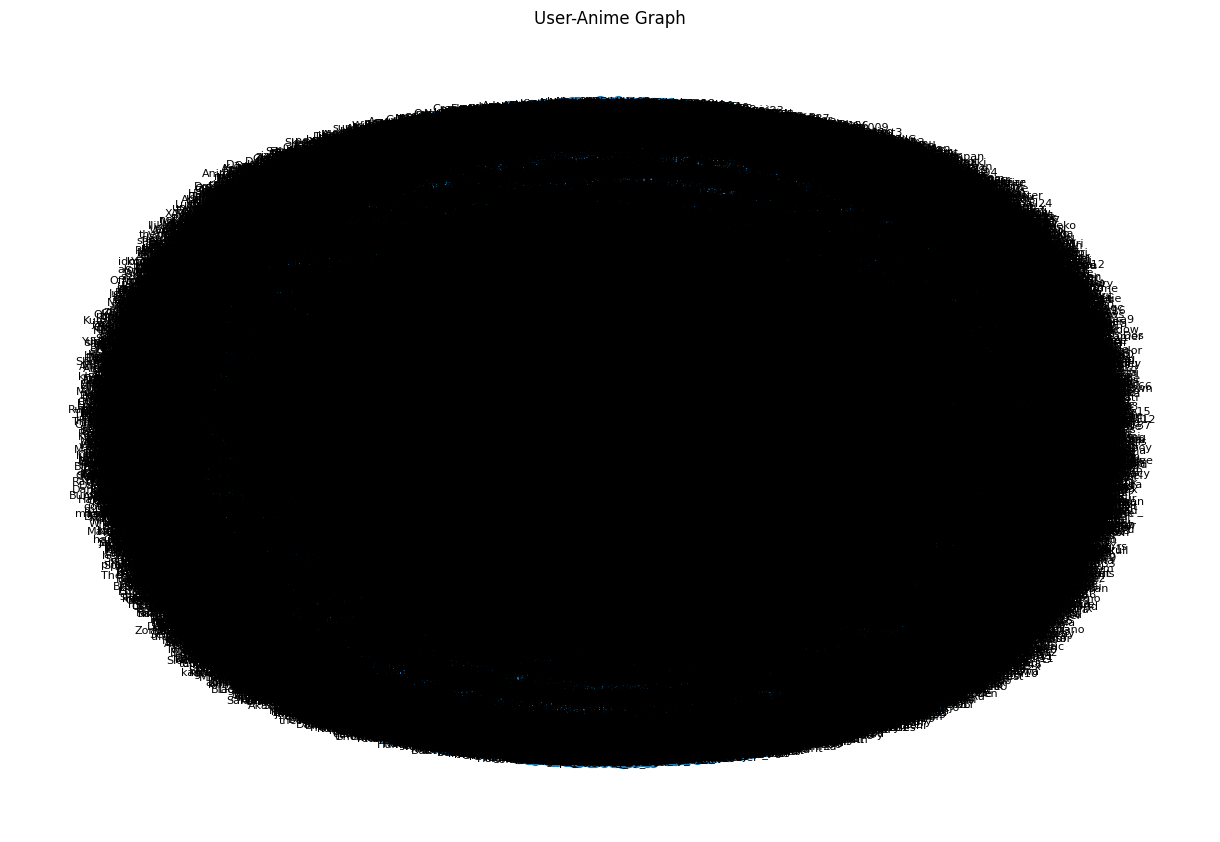

In [4]:
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes for users and anime
users = df['username'].unique()
anime = df['anime_id'].unique()

G.add_nodes_from(users, bipartite=0)  # Add user nodes
G.add_nodes_from(anime, bipartite=1)  # Add anime nodes

# Add edges based on the dataset
for _, row in df.iterrows():
    G.add_edge(row['username'], row['anime_id'], status=row['my_status'])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.1)  # Position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)
plt.title('User-Anime Graph')
plt.show()

# Analyze Connections
Analyze the graph to find patterns and connections between users and anime.

In [5]:
# Analyze Connections

# Calculate the degree centrality for users and anime
user_centrality = nx.degree_centrality(G)
anime_centrality = {node: centrality for node, centrality in user_centrality.items() if node in anime}

# Find the top 10 anime with the highest degree centrality
top_10_anime = sorted(anime_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Display the top 10 anime
print("Top 10 Anime with Highest Degree Centrality:")
for anime_id, centrality in top_10_anime:
    print(f"Anime ID: {anime_id}, Centrality: {centrality}")

# Calculate the shortest path between two users
user1 = users[0]
user2 = users[1]
shortest_path = nx.shortest_path(G, source=user1, target=user2)

# Display the shortest path
print(f"Shortest path between User {user1} and User {user2}: {shortest_path}")

# Calculate the clustering coefficient for the graph
clustering_coefficient = nx.clustering(G)

# Display the average clustering coefficient
avg_clustering_coefficient = np.mean(list(clustering_coefficient.values()))
print(f"Average Clustering Coefficient: {avg_clustering_coefficient}")

# Calculate the connected components of the graph
connected_components = list(nx.connected_components(G))

# Display the number of connected components
print(f"Number of Connected Components: {len(connected_components)}")

# Display the size of the largest connected component
largest_component = max(connected_components, key=len)
print(f"Size of Largest Connected Component: {len(largest_component)}")

Top 10 Anime with Highest Degree Centrality:
Anime ID: 16498, Centrality: 0.1323735280393072
Anime ID: 6547, Centrality: 0.13031484175564764
Anime ID: 11757, Centrality: 0.12676017677252888
Anime ID: 9253, Centrality: 0.11516291070791358
Anime ID: 4224, Centrality: 0.11013971617578436
Anime ID: 1575, Centrality: 0.10760066975927095
Anime ID: 30276, Centrality: 0.10587137328099695
Anime ID: 5114, Centrality: 0.10366171666986906
Anime ID: 11111, Centrality: 0.10230298372265378
Anime ID: 9756, Centrality: 0.10017567456287227
Shortest path between User Damonashu and User bskai: ['Damonashu', 68, 'Xinil', 120, 'bskai']
Average Clustering Coefficient: 0.0
Number of Connected Components: 2
Size of Largest Connected Component: 72861


# Predict Anime Watching Probability
Use graph algorithms to predict the probability of a user watching a particular anime based on their connections.

In [6]:
# Predict Anime Watching Probability

# Use the Jaccard Coefficient to predict the probability of a user watching a particular anime
predictions = []
for user in users:
    for anime_id in anime:
        if not G.has_edge(user, anime_id):
            # Calculate the Jaccard Coefficient for the user-anime pair
            jaccard_coefficient = list(nx.jaccard_coefficient(G, [(user, anime_id)]))[0][2]
            predictions.append((user, anime_id, jaccard_coefficient))

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['username', 'anime_id', 'jaccard_coefficient'])

# Display the top 10 predictions with the highest Jaccard Coefficient
top_10_predictions = predictions_df.sort_values(by='jaccard_coefficient', ascending=False).head(10)
print("Top 10 Predictions with Highest Jaccard Coefficient:")
print(top_10_predictions)

# Visualize the top 10 predictions
plt.figure(figsize=(12, 8))
plt.barh(top_10_predictions['anime_id'].astype(str), top_10_predictions['jaccard_coefficient'], color='skyblue')
plt.xlabel('Jaccard Coefficient')
plt.ylabel('Anime ID')
plt.title('Top 10 Predictions with Highest Jaccard Coefficient')
plt.gca().invert_yaxis()
plt.show()

KeyboardInterrupt: 